## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
# import requisite libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
# load the dataset 
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
## Check shape of the data
df.shape

(319795, 18)

In [4]:
## Check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [5]:
## Check the statistical summary of the data - Numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [6]:
## Check the statistical summary of the data - Characteristic (Columnar)
# df.describe(include=['object']).T (Alternate code)
df.describe(include=['O']).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [7]:
## Check the statistical summary of the data - Characteristic 
# df.describe(include=['object']) (Alternate code)
df.describe(include=['O'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


# inferences
The table  provided shows a summary of categorical variables from a dataset. Here are some key inferences one can draw from this summary:

1. Dominant Categories:
   - For most of the binary variables (e.g., `HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Diabetic`, `PhysicalActivity`, `Asthma`, `KidneyDisease`, `SkinCancer`), the category "No" is the most frequent. This suggests that the majority of the population in this dataset does not have these conditions or behaviors.
   - For `Sex`, the most frequent category is "Female", indicating that there are more females than males in this dataset.
   - For `GenHealth`, the most frequent category is "Very good," suggesting that a significant portion of the population rates their general health as very good.


2. Imbalance in Categorical Data:
   - The large difference between the most frequent and the other categories in variables like `HeartDisease`, `Stroke`, and `KidneyDisease` implies a significant imbalance. This could affect the performance of machine learning models if not addressed (e.g., through oversampling, undersampling, or using balanced metrics).

3. Age Distribution:
   - The most frequent age category is "65-69," suggesting that the dataset may be skewed towards older adults. This could influence the overall health statistics and outcomes in this dataset.

4. Health Behaviors:
   - The high frequency of "No" in `Smoking` and `AlcoholDrinking` indicates that the majority of this population does not engage in smoking or drinking, which could be a factor in the prevalence of health conditions.

5. Race Distribution:
   - The most frequent race is "White", suggesting that the dataset has a racial skew, which could be important for understanding health disparities.

Considerations:
- The high frequency of "No" across many health-related variables could indicate either a generally healthy population or underreporting of health conditions.
- The demographic skew towards females and older adults might influence health outcomes and should be considered when generalizing results.
- The racial distribution should be noted when interpreting the data for studies on racial health disparities.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [8]:
# percentage of missing values
# df.isnull().mean() * 100 (Alternate code)
df.isnull().sum()/len(df) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

# Drop the missing values if there are any.
As there are no missing values, nothing needs to be dropped.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [9]:
# Check duplicate rows Lab Class Code
len(df[df.duplicated()])

18078

In [10]:
# alternate method
duplicates = df.duplicated()
# Display the result
if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("Here are the duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 18078
Here are the duplicate rows:
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
2182             No  19.85      No              No     No             0.0   
3182             No  28.19      No              No     No             0.0   
3397             No  26.54      No              No     No             0.0   
3650             No  32.89     Yes              No     No             2.0   
4061             No  25.84      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319671           No  25.06      No              No     No             0.0   
319689           No  27.44      No              No     No             0.0   
319726           No  30.41      No              No     No             0.0   
319751           No  34.96      No              No     No             0.0   
319776           No  27.98      No              No     No             0.0   

        Mental

In [11]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
# Display the DataFrame after removing duplicates
print("DataFrame after removing duplicate rows:")
print(df)

DataFrame after removing duplicate rows:
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking  

In [13]:
# Check the shape after removing duplicates
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

<Axes: ylabel='count'>

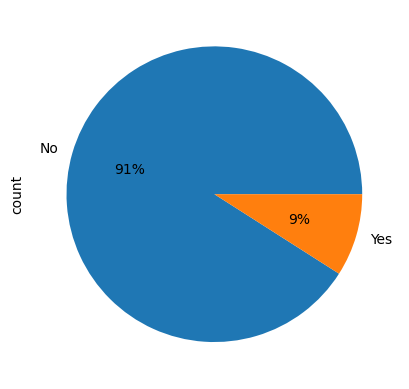

In [14]:
# Lab Class Code
df['HeartDisease'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

Observation: The 'HeartDisease' variable is highly imbalanced, with over 90% of the instances in a single category.

Distribution of 'HeartDisease' variable:
HeartDisease
No     90.964712
Yes     9.035288
Name: proportion, dtype: float64


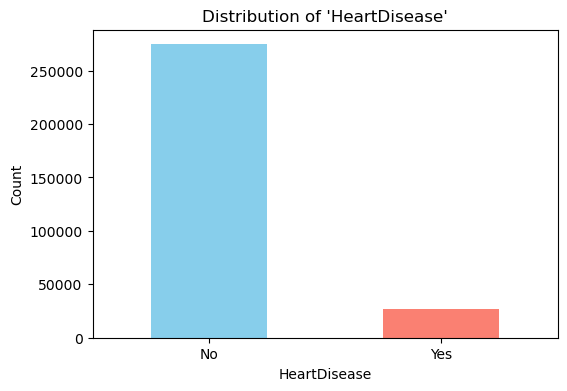


Observation: The 'HeartDisease' variable is highly imbalanced, with over 90% of the instances in a single category.


In [15]:
# Tried alternate code for bar
# Check the distribution of the 'HeartDisease' variable
heart_disease_distribution = df['HeartDisease'].value_counts(normalize=True) * 100

# Display the distribution
print("Distribution of 'HeartDisease' variable:")
print(heart_disease_distribution)

# Plot the distribution
plt.figure(figsize=(6, 4))
df['HeartDisease'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of 'HeartDisease'")
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Observations
if heart_disease_distribution.max() > 90:
    print("\nObservation: The 'HeartDisease' variable is highly imbalanced, with over 90% of the instances in a single category.")
elif heart_disease_distribution.max() > 70:
    print("\nObservation: The 'HeartDisease' variable is moderately imbalanced, with one category significantly dominating.")
else:
    print("\nObservation: The 'HeartDisease' variable has a relatively balanced distribution.")

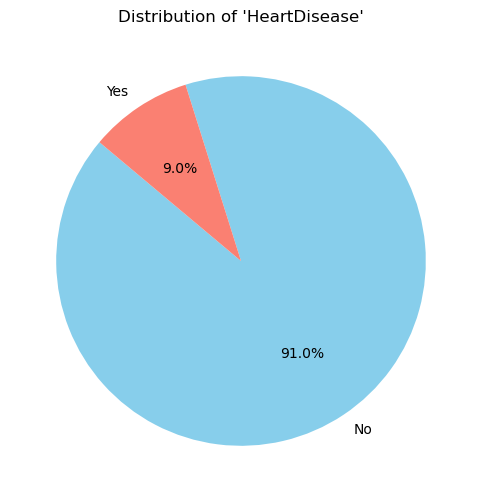

In [16]:
# Tried alternate code for pie
# Check the distribution of the 'HeartDisease' variable
heart_disease_distribution = df['HeartDisease'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_distribution, labels=heart_disease_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title("Distribution of 'HeartDisease'")
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [17]:
# Select categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

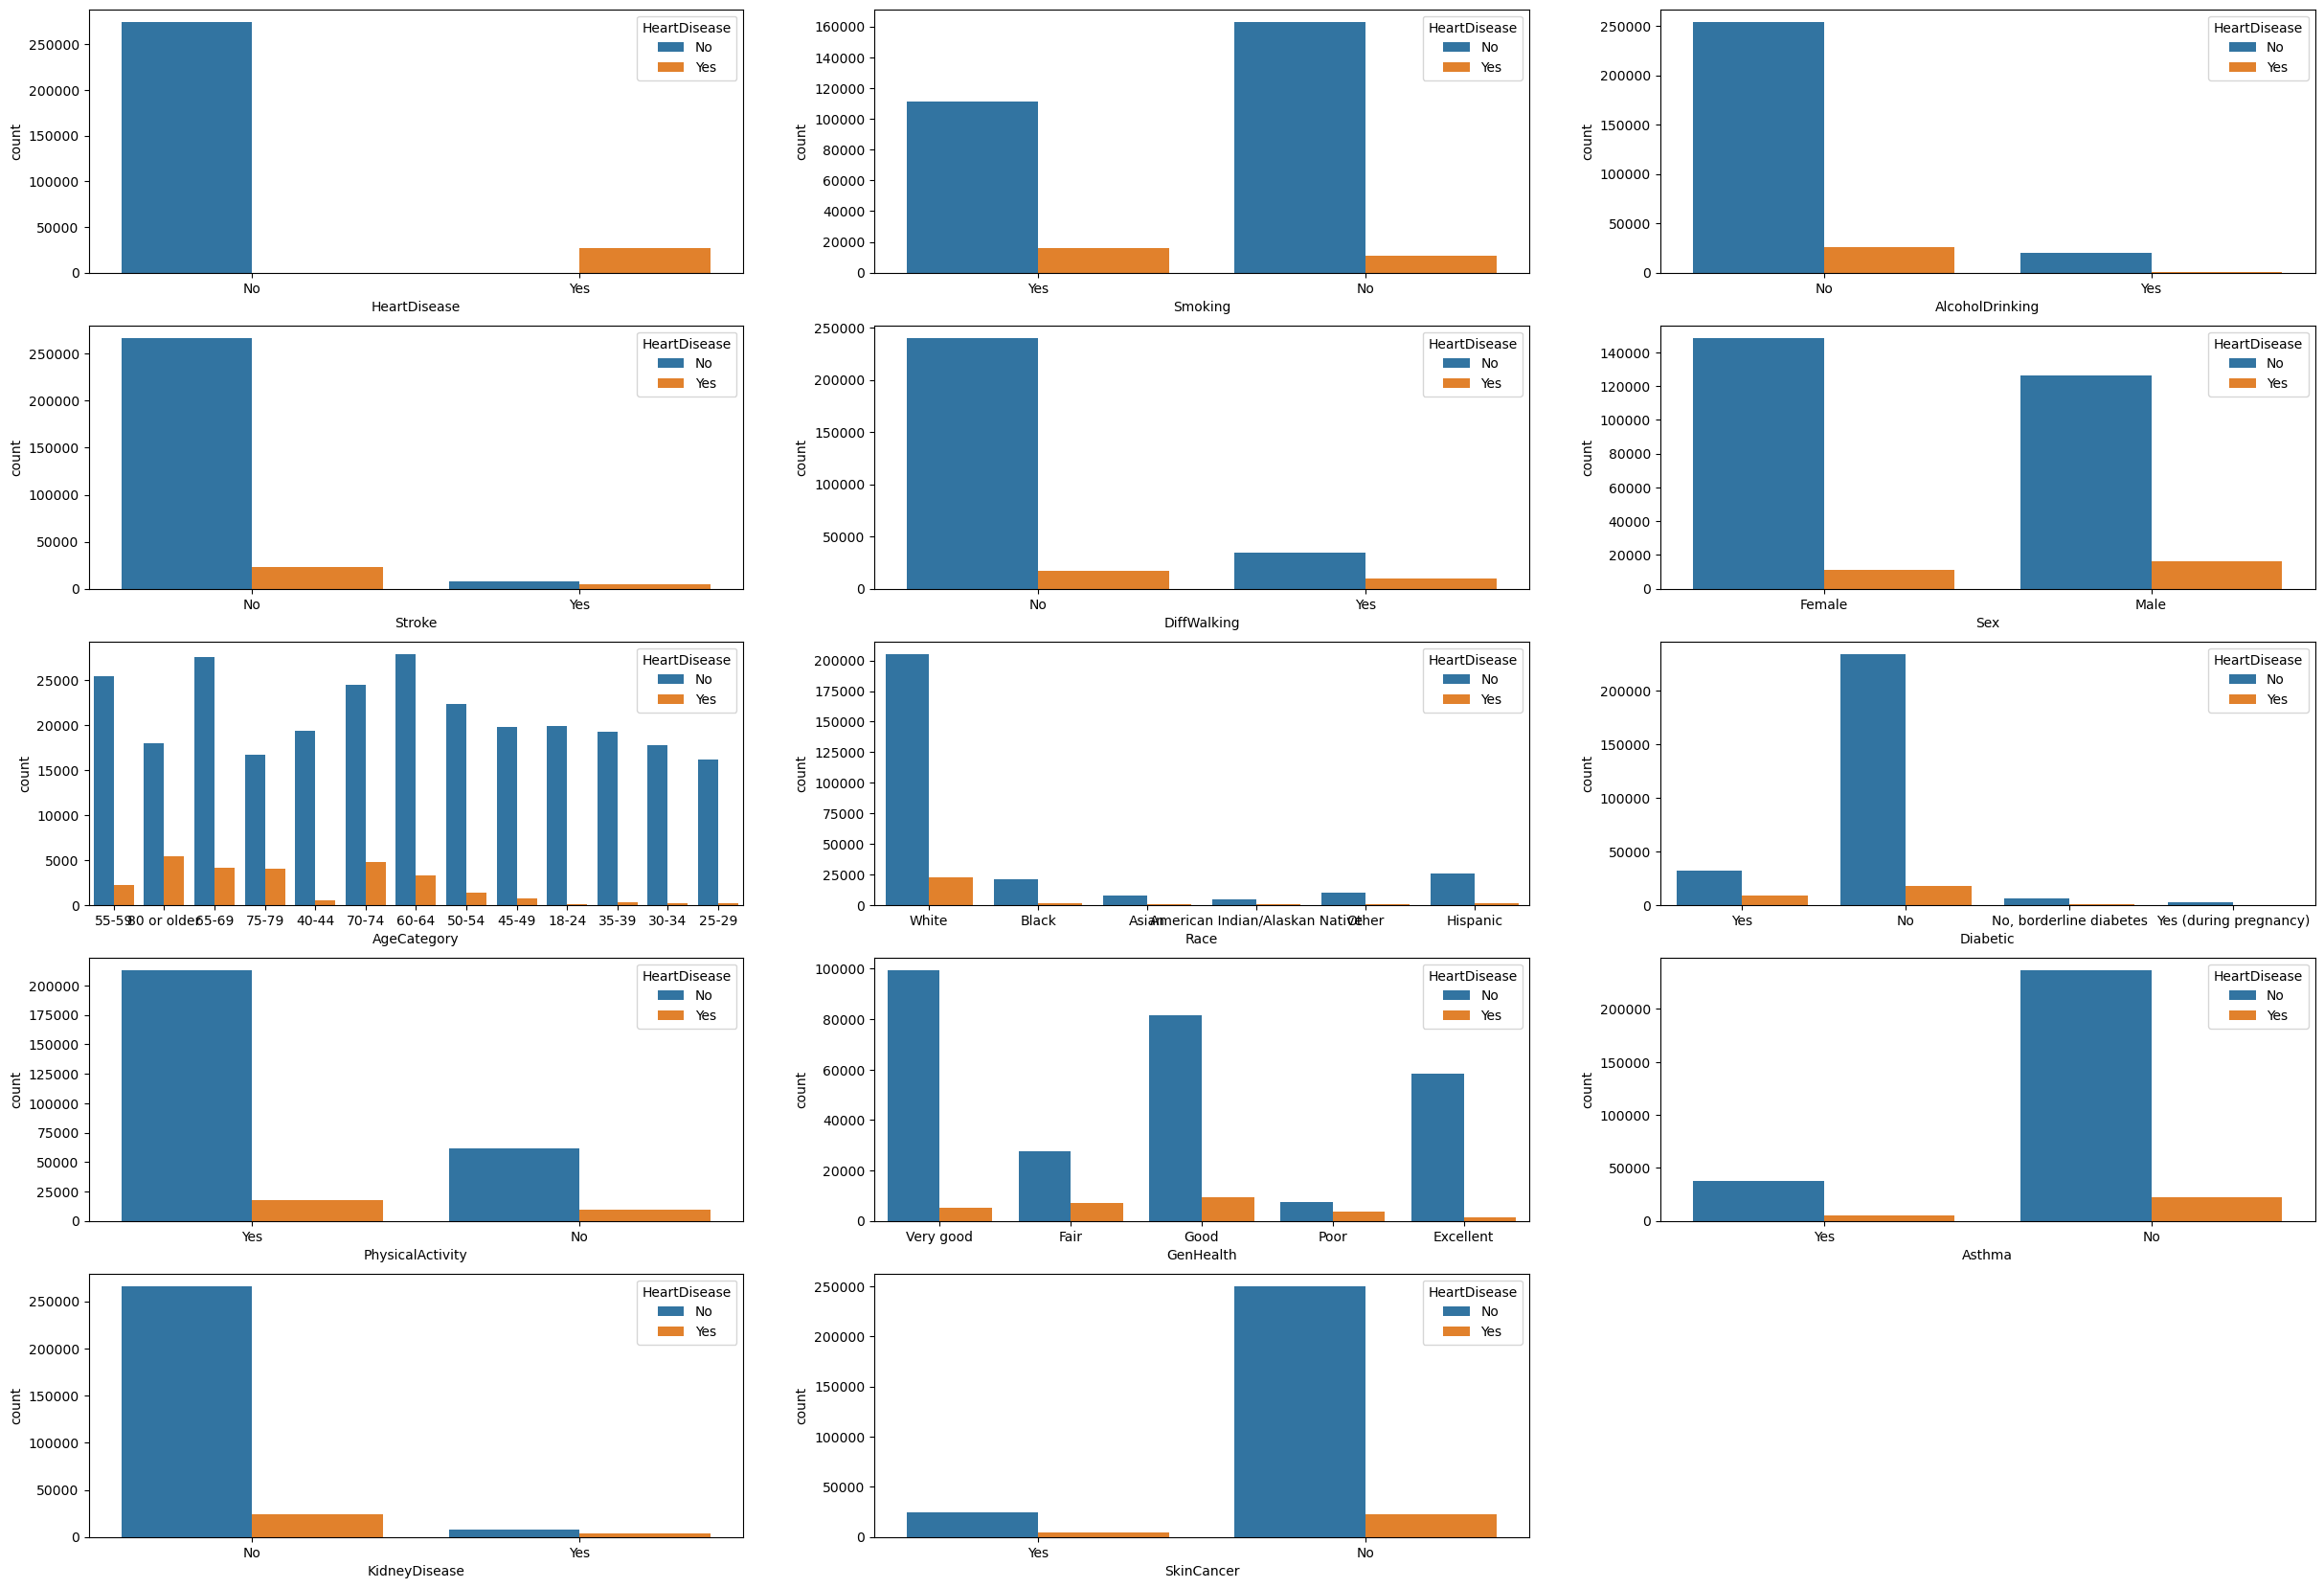

In [18]:
# Lab Class Code for Visualize the distribution
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
	plt.subplot(6,3,i)
	sns.countplot(x=feature, hue='HeartDisease', data=df)
	i +=1 

The following can be observed from the plot:

- People who smoke have higher chances of heart disease than non smokers.
- Male are more prone to suffer from heart diseases as compared to females.
- People with age limit in between 55 to 75 has higher chances of getting heart diseases.
- If M or F has difficulty in walking or climbing stairs there is high probability of suffering from some heart disease.
- There are higher chances of a person having heart disease if he does not have any kidney disease.

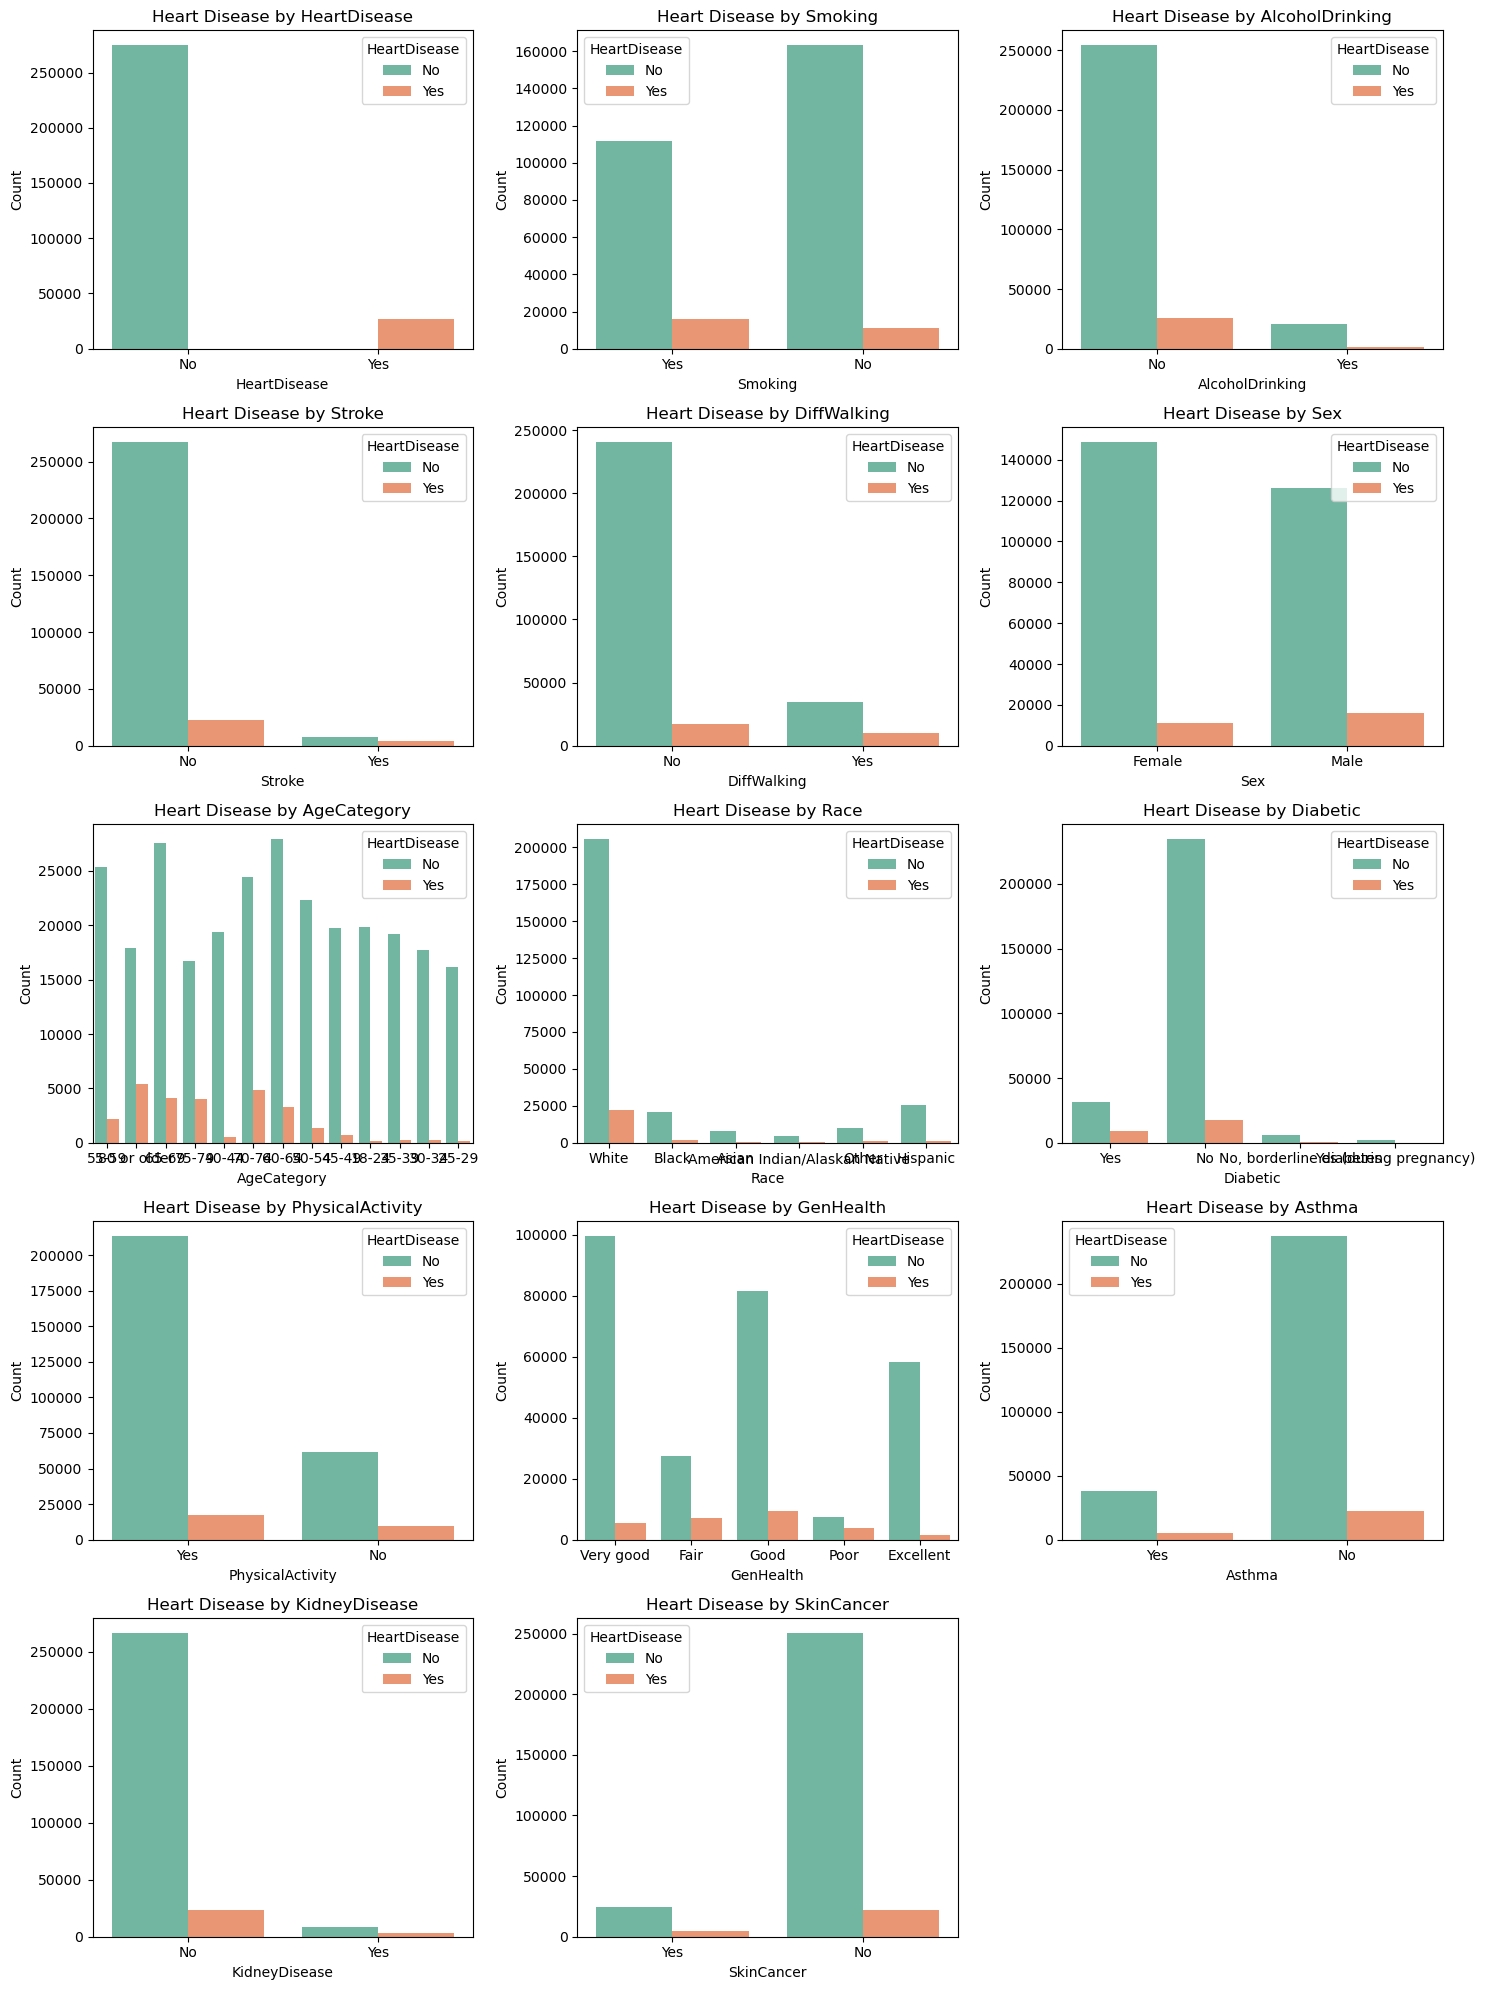


Observations on distribution of 'HeartDisease':
- HeartDisease should be analyzed for patterns, whether categories within HeartDisease have greater or lesser rates of Heart disease.
- Smoking should be analyzed for patterns, whether categories within Smoking have greater or lesser rates of Heart disease.
- AlcoholDrinking should be analyzed for patterns, whether categories within AlcoholDrinking have greater or lesser rates of Heart disease.
- Stroke should be analyzed for patterns, whether categories within Stroke have greater or lesser rates of Heart disease.
- DiffWalking should be analyzed for patterns, whether categories within DiffWalking have greater or lesser rates of Heart disease.
- Sex should be analyzed for patterns, whether categories within Sex have greater or lesser rates of Heart disease.
- AgeCategory should be analyzed for patterns, whether categories within AgeCategory have greater or lesser rates of Heart disease.
- Race should be analyzed for patterns, whether cat

In [19]:
# Visualizing the distribution (alternate code)
import math

# 'df' is DataFrame and separated the categorical features
categorical_features = df.select_dtypes(include=[object]).columns

# Determine the number of rows and columns needed
num_features = len(categorical_features)
num_cols = 3  # Adjust this number based on how many columns you want
num_rows = math.ceil(num_features / num_cols)

# Set up the plotting area
plt.figure(figsize=(num_cols * 5, num_rows * 4))

# Iterate over the categorical features and plot the distribution of 'HeartDisease'
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)  # Dynamically set the grid size based on the number of features
    sns.countplot(x=feature, hue='HeartDisease', data=df, palette='Set2')
    plt.title(f"Heart Disease by {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Observations
print("\nObservations on distribution of 'HeartDisease':")
for feature in categorical_features:
    print(f"- {feature} should be analyzed for patterns, whether categories within {feature} have greater or lesser rates of Heart disease.")


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [20]:
# Check the unique categories in the 'Diabetic' column
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [21]:
# Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.
df['Diabetic'] = df['Diabetic'].replace({ 'Yes (during pregnancy)': 'Yes',  'No, borderline diabetes': 'No'})

In [22]:
# Check the value count after replacement
df['Diabetic'] .value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

In [23]:
# Check the unique categories after replacement
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [24]:
# Replace 'No' as 0 and 'Yes' as 1.
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1, 'No':0})

In [25]:
# Check the value count after replacement
df['HeartDisease'] .value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [26]:
## Label Encoding categorical variables using "AgeCategory", "Race", and "GenHealth" label encoder

## select object datatype variables
object_type_variables = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [27]:
df = pd.get_dummies(df,drop_first=True)

In [28]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,True,False,False,False,False,True,True,True,False,True
1,0,20.34,0.0,0.0,12,5,4,7.0,False,False,True,False,False,False,True,False,False,False
2,0,26.58,20.0,30.0,9,5,1,8.0,True,False,False,False,True,True,True,True,False,False
3,0,24.21,0.0,0.0,11,5,2,6.0,False,False,False,False,False,False,False,False,False,True
4,0,23.71,28.0,0.0,4,5,4,8.0,False,False,False,True,False,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [29]:
X = df.drop('HeartDisease', axis = 1)
Y = df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [31]:
# Lab Class Code with 80% Train 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(241373, 17) (60344, 17)
(241373,) (60344,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [32]:
# Standardize numerical Columns
ss = StandardScaler()
X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])

In [33]:
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
151545,1.763596,-0.437756,1.340216,-0.980012,-1.102277,1.174878,0.625942,False,False,False,False,False,False,True,False,False,False
221698,2.753961,-0.437756,3.187218,0.694533,0.513424,-0.148996,-0.739278,False,False,False,False,True,True,True,False,False,True


In [34]:
X_test.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
305265,2.100413,-0.437756,-0.506786,-0.42183,0.513424,-0.148996,0.625942,True,True,True,False,True,True,True,False,False,False
180450,0.564651,-0.437756,-0.506786,-0.42183,0.513424,-0.148996,0.625942,True,False,False,False,True,True,False,False,False,False


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [35]:
#Trains the given model on the training data and evaluates it on the test data.
def fit_and_print(model, X_train, Y_train, X_test, Y_test):
    # Fit the model on the training data
       model.fit(X_train, Y_train)
    # Make predictions on the test set
       pred = model.predict(X_test)
    # Calculate the accuracy score
       accuracy = accuracy_score(Y_test, pred)
       return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [36]:
# Lab Class Code

# Initialize the models
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf), ('knn', knn), ('gb', gb), ('adb', adb)]

# Initialize the Stacking Classifier
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [37]:
# Lab Class Code
# Initialize an empty DataFrame to store results
result = pd.DataFrame(columns=['Accuracy'])

# Iterate over models and their names
for model, model_name in zip(
    [lr, nb, knn, dt, rf, adb, gb, sc],
    ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']
):
    # Calculate accuracy using the fit_and_print function
    accuracy = fit_and_print(model, X_train, Y_train, X_test, Y_test)
    
    # Store the result in the DataFrame
    result.loc[model_name] = accuracy

# Display the result DataFrame
print(result)

                     Accuracy
Logistic Regression  0.909668
Naive Bayes          0.839636
KNN                  0.901564
Decision Tree        0.854915
Random Forest        0.898366
Ada Boost            0.909966
Gradient Boost       0.910927
Stacking             0.904580


In [38]:
# alternate code for 70% train and 30% test

# Split the dataset into 70% train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#Print the shape of the train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (211201, 17)
Shape of X_test: (90516, 17)
Shape of Y_train: (211201,)
Shape of Y_test: (90516,)


In [41]:
# alternate coding tried for 70% 30%

# Define the fit_and_print Function
def fit_and_print(model, X_train, Y_train, X_test, Y_test):
    # Fit the model on the training data
    model.fit(X_train, Y_train)
    
    # Make predictions on the test set
    Y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)   
    return accuracy

Logistic Regression Accuracy: 0.9092
K-Nearest Neighbors Accuracy: 0.9017
Naive Bayes Accuracy: 0.8402
Decision Tree Accuracy: 0.8546
Random Forest Accuracy: 0.8983
AdaBoost Accuracy: 0.9103
Gradient Boosting Accuracy: 0.9108
Stacked Classifier Accuracy: 0.9102

Summary of Model Accuracies:
Logistic Regression: 0.9092
K-Nearest Neighbors: 0.9017
Naive Bayes: 0.8402
Decision Tree: 0.8546
Random Forest: 0.8983
AdaBoost: 0.9103
Gradient Boosting: 0.9108
Stacked Classifier: 0.9102


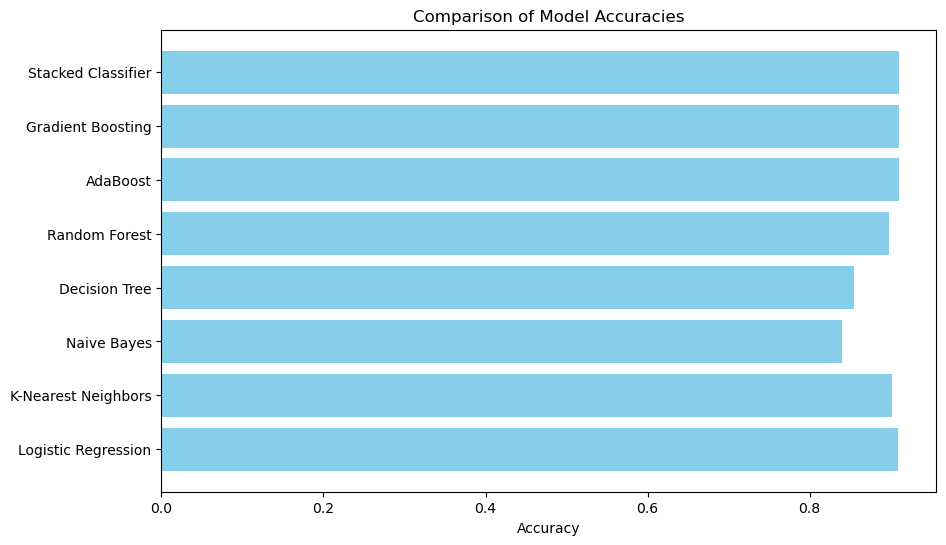

In [42]:
# Alternate code for 70% 30% to Run Model Evaluations
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# List to store accuracy results
results = {}

# Train and evaluate each model
for name, model in models.items():
    accuracy = fit_and_print(model, X_train, Y_train, X_test, Y_test)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Implement Stacking Classifier
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('gnb', GaussianNB())
]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())
stacked_accuracy = fit_and_print(stacked_model, X_train, Y_train, X_test, Y_test)
results['Stacked Classifier'] = stacked_accuracy
print(f"Stacked Classifier Accuracy: {stacked_accuracy:.4f}")

# Print a summary of all results
print("\nSummary of Model Accuracies:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Compare all models and their accuracies
# Plotting the accuracy of all models
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

### Conclusion

# Model Evaluation and Improvement Strategies

## Observations

### High-Performing Models:
- **Gradient Boosting** achieved the highest accuracy at `0.9108`, closely followed by AdaBoost at `0.9103` and the Stacked Classifier at `0.9102`. These ensemble methods excel by combining multiple weak learners to form a robust model.
- **Logistic Regression** also performed very well with an accuracy of `0.9092`, indicating a significant linear relationship between the features and the target variable.

### Moderate Performers:
- **K-Nearest Neighbors (KNN)** had a respectable accuracy of `0.9017`. It is strong but might be limited by the curse of dimensionality or issues related to feature scaling.
- **Random Forest** showed a slightly lower accuracy at `0.8983`. This suggests that it might require tuning or additional trees to improve its stability and performance.

### Lower-Performing Models:
- **Naive Bayes** had the lowest accuracy at `0.8402`, likely due to its assumption of feature independence which may not hold in this dataset.
- **Decision Tree** recorded an accuracy of `0.8546`, generally lower than ensemble methods because of its tendency to overfit.

## Model Accuracy Detailing:
- **Gradient Boosting (0.9108)**: Best performing model, excels through iterative refinement and focusing on difficult instances.
- **AdaBoost (0.9103)**: Very close to Gradient Boosting, indicating effectiveness of boosting strategies.
- **Stacked Classifier (0.9102)**: Combines multiple models; slightly underperforms compared to Gradient Boosting.
- **Logistic Regression (0.9092)**: Shows strong linear performance.
- **K-Nearest Neighbors (0.9017)**: Effective but potentially affected by high dimensionality.
- **Random Forest (0.8983)**: Robust but likely needs more tuning.
- **Decision Tree (0.8546)**: Prone to overfitting, performs worse than ensembles.
- **Naive Bayes (0.8402)**: Low accuracy due to inappropriate assumptions about feature independence.

## Future Steps to Improve Model Accuracy:

### Hyperparameter Tuning:
- Optimize models like Gradient Boosting, AdaBoost, and Stacked Classifier using Grid Search or Randomized Search.
- Tune key parameters such as learning rate, number of estimators, and tree depth.

### Feature Engineering:
- Investigate new features or interaction terms.
- Consider dimensionality reduction techniques to aid models like KNN.

### Cross-Validation:
- Employ cross-validation to verify model consistency and robustness, reducing overfitting risks.

### Addressing Class Imbalance:
- Apply techniques like SMOTE or adjust class weights to correct imbalances.

### Ensemble Methods:
- Experiment further with ensemble techniques and meta-classifiers to improve predictions.

### Model Interpretability:
- Use tools like SHAP to gain insights into feature contributions and model decisions, guiding further adjustments.

## Conclusion:

Ensemble methods such as Gradient Boosting, AdaBoost, and the Stacked Classifier show superior performance for this dataset. To further enhance model accuracy, it's essential to focus on detailed hyperparameter tuning, advanced feature engineering, and robust validation techniques. The lower performance of simpler models like Naive Bayes and Decision Tree underscores thhe need for careful model selection and validation.


----
## Happy Learning:)
----